In [1]:
###Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

In [2]:
###Files to load into data frames
csv_file1 = 'C:\\Users\\arodr\\OneDrive\\Documents\\CTA_Ridership_Info\\CTA_BusStops.csv'
cta_busstops_df = pd.read_csv(csv_file1) 

csv_file2 = 'C:\\Users\\arodr\\OneDrive\\Documents\\CTA_Ridership_Info\\CTA_-_System_Information_-_List_of__L__Stops_-_Map.csv'
cta_railstations_df = pd.read_csv(csv_file2) 

csv_file3 = 'C:\\Users\\arodr\\OneDrive\\Documents\\CTA_Ridership_Info\\CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals.csv'
cta_ridership_df = pd.read_csv(csv_file3) 

In [3]:
###Bus stops dataframe
cta_busstops_df

,bus_name,lat,long
0,East River Rd & Berwyn,41.975017,-87.846553
1,Cumberland Blue Line Station,41.983680,-87.839028
2,Lawrence & Cumberland,41.966502,-87.836296
3,Cumberland & Foster,41.973896,-87.836439
4,Cumberland & Berwyn,41.975763,-87.836687
...,...,...,...
6133,Avenue O & 118th Street,41.680882,-87.539628
6134,Ewing & 101st Street,41.711905,-87.535147
6135,Avenue C & 112th Street,41.691916,-87.527104
6136,Avenue C & 110th Street,41.695509,-87.527077


In [4]:
###Rail stations dataframe
cta_railstations_df.head(10)

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30186,Pulaski (Midway-bound),Pulaski,40960,True,False,False,False,False,False,False,False,False,True,"(41.799756, -87.724493)"
1,30223,Garfield (Howard-bound),Garfield,41170,True,True,False,False,False,False,False,False,False,False,"(41.79542, -87.631157)"
2,30160,Rosemont (Forest Pk-bound),Rosemont,40820,True,False,True,False,False,False,False,False,False,False,"(41.983507, -87.859388)"
3,30241,Central (Linden-bound),Central,41250,False,False,False,False,False,True,True,False,False,False,"(42.063987, -87.685617)"
4,30119,Ridgeland (63rd-bound),Ridgeland,40610,False,False,False,True,False,False,False,False,False,False,"(41.887159, -87.783661)"
5,30085,Clinton (Forest Pk-bound),Clinton,40430,False,False,True,False,False,False,False,False,False,False,"(41.875539, -87.640984)"
6,30020,Morse (Howard-bound),Morse,40100,False,True,False,False,False,False,False,False,False,False,"(42.008362, -87.665909)"
7,30115,Damen/Milwaukee (O'Hare-bound),Damen,40590,False,False,True,False,False,False,False,False,False,False,"(41.909744, -87.677437)"
8,30168,Francisco (Loop-bound),Francisco,40870,True,False,False,False,True,False,False,False,False,False,"(41.966046, -87.701644)"
9,30263,Oak Park (63rd-bound),Oak Park,41350,False,False,False,True,False,False,False,False,False,False,"(41.886988, -87.793783)"


In [5]:
###Display first 50 rows of the dataframe
cta_ridership_df.head(50)

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,1/1/2001,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,1/1/2001,1489.1,1054.0,718.0,40567
2,40100,Morse,1/1/2001,4412.5,3064.5,2087.8,119772
3,41300,Loyola,1/1/2001,4664.5,3156.0,1952.8,125008
4,40760,Granville,1/1/2001,3109.8,2126.0,1453.8,84189
5,40880,Thorndale,1/1/2001,2977.7,1840.3,1262.6,79184
6,41380,Bryn Mawr,1/1/2001,4425.4,2708.3,1881.2,117597
7,40340,Berwyn,1/1/2001,3329.6,2050.8,1445.6,88683
8,41200,Argyle,1/1/2001,2745.5,1874.5,1268.2,74240
9,40770,Lawrence,1/1/2001,2689.6,1869.0,1227.8,72786


In [6]:
###Quick Central Tendency Stats
cta_ridership_df.describe()

,station_id,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
count,36191.000000,36191.000000,36191.000000,36191.000000,36191.000000
mean,40765.717996,3657.779150,2138.912583,1563.578807,94573.566577
std,448.582814,3320.654802,2237.015768,1746.571697,86704.806145
min,40010.000000,0.000000,0.000000,0.000000,0.000000
25%,40370.000000,1302.400000,741.000000,510.800000,33728.000000
50%,40760.000000,2721.800000,1354.500000,943.500000,68467.000000
75%,41150.000000,4793.750000,2752.450000,1952.400000,125043.500000
max,41700.000000,24041.400000,19171.300000,15982.000000,670496.000000


In [7]:
###Save files 1 & 2 as csvs
cta_busstops_df.to_csv('C:\\Users\\arodr\\OneDrive\\Documents\\CTA_Ridership_Info\\CTA_BusStops.csv',index=False)
cta_railstations_df.to_csv('C:\\Users\\arodr\\OneDrive\\Documents\\CTA_Ridership_Info\\CTA_RailStations.csv',index=False)

In [8]:
###Filter data to only include "Damen" train stations in the stationname column 
cta_ridership_df[cta_ridership_df['stationame'] == 'Damen/Milwaukee']

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
55,40590,Damen/Milwaukee,1/1/2001,4115.9,1846.0,1134.0,103604
197,40590,Damen/Milwaukee,2/1/2001,4170.4,1789.5,1266.0,95630
338,40590,Damen/Milwaukee,3/1/2001,4253.1,1928.6,1264.3,108269
479,40590,Damen/Milwaukee,4/1/2001,4262.8,1988.0,1336.2,104151
621,40590,Damen/Milwaukee,5/1/2001,4360.0,2012.8,1405.8,111001
...,...,...,...,...,...,...,...
35531,40590,Damen/Milwaukee,10/1/2021,2785.3,2892.2,2089.4,83399
35674,40590,Damen/Milwaukee,11/1/2021,2638.5,2419.0,1486.8,72518
35817,40590,Damen/Milwaukee,12/1/2021,2315.1,1924.5,1408.2,64765
35960,40590,Damen/Milwaukee,1/1/2022,1676.5,1529.0,1035.6,48029


In [9]:
#Display column data types
cta_ridership_df.dtypes

station_id                    int64
stationame                   object
month_beginning              object
avg_weekday_rides           float64
avg_saturday_rides          float64
avg_sunday-holiday_rides    float64
monthtotal                    int64
dtype: object

In [10]:
###Create a new column that converts the "date_time" column into a datetime format
cta_ridership_df['date_time'] = pd.to_datetime(cta_ridership_df['month_beginning'])

In [11]:
###Filter data to include only station names named Damen/Milwaukee, and only in the year 2020
Damen_Milwaukee_Rides_FY20 = cta_ridership_df[(cta_ridership_df['stationame'] == 'Damen/Milwaukee') &
                       (cta_ridership_df['date_time'] >= '01/01/2020') &
                       (cta_ridership_df['date_time'] < '12/31/2020')]
Damen_Milwaukee_Rides_FY20

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,date_time
32528,40590,Damen/Milwaukee,1/1/2020,5980.0,3053.5,2556.0,156555,2020-01-01
32671,40590,Damen/Milwaukee,2/1/2020,5919.8,3646.0,2669.0,147301,2020-02-01
32814,40590,Damen/Milwaukee,3/1/2020,2905.9,1770.5,1622.2,79122,2020-03-01
32957,40590,Damen/Milwaukee,4/1/2020,336.8,267.0,200.3,9278,2020-04-01
33100,40590,Damen/Milwaukee,5/1/2020,352.0,309.6,188.7,9719,2020-05-01
33243,40590,Damen/Milwaukee,6/1/2020,570.5,539.5,441.8,16476,2020-06-01
33386,40590,Damen/Milwaukee,7/1/2020,926.0,785.3,641.0,26718,2020-07-01
33529,40590,Damen/Milwaukee,8/1/2020,975.5,851.0,664.8,28065,2020-08-01
33672,40590,Damen/Milwaukee,9/1/2020,1088.8,1091.0,816.2,31310,2020-09-01
33815,40590,Damen/Milwaukee,10/1/2020,1137.1,1101.8,815.3,33786,2020-10-01


In [12]:
###Filter data to include only station names named Damen/Milwaukee, and only in the year 2022
Damen_Milwaukee_Rides_FY22 = cta_ridership_df[(cta_ridership_df['stationame'] == 'Damen/Milwaukee') &
                       (cta_ridership_df['date_time'] >= '01/01/2022') &
                       (cta_ridership_df['date_time'] < '12/31/2022')]
Damen_Milwaukee_Rides_FY22

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,date_time
35960,40590,Damen/Milwaukee,1/1/2022,1676.5,1529.0,1035.6,48029,2022-01-01
36103,40590,Damen/Milwaukee,2/1/2022,2201.1,1887.3,1377.0,57078,2022-02-01


In [13]:
###Totsl monthly rides for the Damen_Milwaukee station in year 2020
Damen_Milwaukee_Rides_FY20['monthtotal'].sum()

582967

In [14]:
###Totsl monthly rides for the Damen_Milwaukee station in year 2022
Damen_Milwaukee_Rides_FY22['monthtotal'].sum()

105107

In [15]:
###Grouping Damen_Milwaukee_FY20 stations by station names
Station_Group = cta_ridership_df.groupby(['stationame'])
Station_Group

In [16]:
Station_Group.groups

{'18th': [76, 218, 359, 501, 643, 784, 926, 1069, 1211, 1353, 1495, 1637, 1779, 1921, 2063, 2205, 2347, 2489, 2631, 2773, 2915, 3057, 3199, 3341, 3483, 3625, 3767, 3909, 4051, 4193, 4335, 4477, 4619, 4761, 4903, 5045, 5187, 5329, 5471, 5613, 5755, 5897, 6039, 6181, 6323, 6465, 6607, 6749, 6891, 7033, 7175, 7317, 7459, 7601, 7743, 7885, 8027, 8169, 8311, 8453, 8595, 8737, 8879, 9021, 9162, 9304, 9446, 9588, 9730, 9872, 10014, 10156, 10298, 10440, 10582, 10724, 10866, 11008, 11150, 11292, 11433, 11575, 11717, 11859, 12001, 12143, 12285, 12427, 12569, 12711, 12853, 12995, 13136, 13278, 13420, 13562, 13704, 13845, 13986, 14127, ...], '35-Bronzeville-IIT': [98, 240, 381, 523, 665, 807, 950, 1092, 1234, 1376, 1518, 1660, 1802, 1944, 2086, 2228, 2370, 2512, 2654, 2796, 2938, 3080, 3222, 3364, 3506, 3648, 3790, 3932, 4074, 4216, 4358, 4500, 4642, 4784, 4926, 5068, 5210, 5352, 5494, 5636, 5778, 5920, 6062, 6204, 6346, 6488, 6630, 6772, 6914, 7056, 7198, 7340, 7482, 7624, 7766, 7908, 8050, 8192,

In [17]:
###Aggregate or add up the monthly totals for each train station
Station_Group['monthtotal'].agg('sum')

stationame
18th                    9436696
35-Bronzeville-IIT     12962281
35th/Archer            16474934
43rd                    6046888
47th-Dan Ryan          18875737
                         ...   
Western-Cermak          5922313
Western-Forest Park     8946055
Western-Orange         21225433
Western/Milwaukee      27022657
Wilson                 36603283
Name: monthtotal, Length: 148, dtype: int64

In [18]:
Station_Totals = pd.DataFrame(Station_Group['monthtotal'].agg('sum'))
Station_Totals.sort_values(ascending=False,by='monthtotal',inplace=True)
Station_Totals

,monthtotal
stationame,
Lake/State,101840791
Clark/Lake,101177021
Chicago/State,93033550
Belmont-North Main,75497566
95th/Dan Ryan,74936225
...,...
King Drive,3969464
Cermak-McCormick Place,2886187
Kostner,2510651


In [19]:
###Top 5 Train Stations
Station_Totals.head(5)

,monthtotal
stationame,
Lake/State,101840791
Clark/Lake,101177021
Chicago/State,93033550
Belmont-North Main,75497566
95th/Dan Ryan,74936225


In [20]:
###Bottom 5 Train Stations
Station_Totals.tail(5)

,monthtotal
stationame,
King Drive,3969464
Cermak-McCormick Place,2886187
Kostner,2510651
Oakton-Skokie,2255310
Homan,27


<AxesSubplot:xlabel='date_time'>

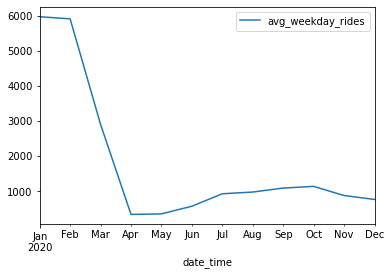

In [21]:
Damen_Milwaukee_Rides_FY20.plot(x ='date_time', y='avg_weekday_rides')

<AxesSubplot:xlabel='date_time'>

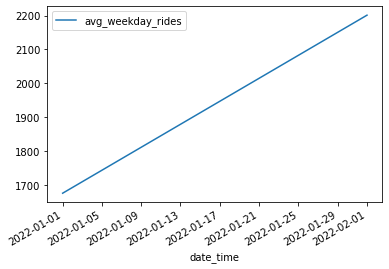

In [22]:
Damen_Milwaukee_Rides_FY22.plot(x ='date_time', y='avg_weekday_rides')

<AxesSubplot:xlabel='stationame'>

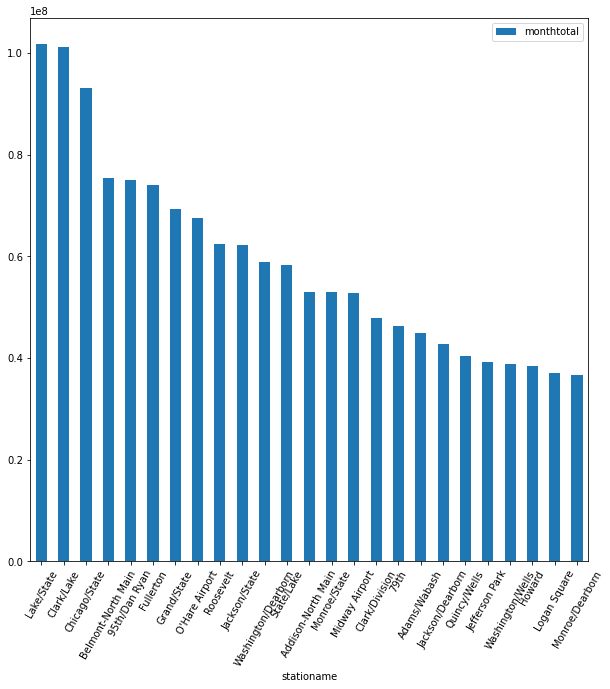

In [23]:
Station_Totals.head(25).plot(kind='bar',rot=60, figsize=(10,10))

In [24]:
from bokeh.tile_providers import get_provider, Vendors 
tile_provider = get_provider(Vendors.WIKIMEDIA)
from bokeh.plotting import figure, show, output_notebook

p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
output_notebook()
show(p)

Loading BokehJS ...

In [25]:
cta_railstations_df

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30186,Pulaski (Midway-bound),Pulaski,40960,True,False,False,False,False,False,False,False,False,True,"(41.799756, -87.724493)"
1,30223,Garfield (Howard-bound),Garfield,41170,True,True,False,False,False,False,False,False,False,False,"(41.79542, -87.631157)"
2,30160,Rosemont (Forest Pk-bound),Rosemont,40820,True,False,True,False,False,False,False,False,False,False,"(41.983507, -87.859388)"
3,30241,Central (Linden-bound),Central,41250,False,False,False,False,False,True,True,False,False,False,"(42.063987, -87.685617)"
4,30119,Ridgeland (63rd-bound),Ridgeland,40610,False,False,False,True,False,False,False,False,False,False,"(41.887159, -87.783661)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,30203,Linden (Linden-bound),Linden,41050,True,False,False,False,False,True,True,False,False,False,"(42.073153, -87.69073)"
296,30266,California (Harlem-bound),California,41360,True,False,False,True,False,False,False,False,False,False,"(41.88422, -87.696234)"
297,30056,Ashland/63rd (Harlem-bound),Ashland/63rd,40290,True,False,False,True,False,False,False,False,False,False,"(41.77886, -87.663766)"
298,30133,Dempster (Linden-bound),Dempster,40690,False,False,False,False,False,True,True,False,False,False,"(42.041655, -87.681602)"


In [26]:
###A function that takes a string of latitude and longitude coordinates (like the ones in the dataframe), and converts them to a tuple of X and Y coordinates.
import math
from ast import literal_eval
def merc(Coords):
    Coordinates = literal_eval(Coords)
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

In [27]:
###Apply it to the entire data set and save it as a new column in the data frame by using the ".apply()" function in pandas and a lambda function in python.
cta_railstations_df['coords_x'] = cta_railstations_df['Location'].apply(lambda x: merc(x)[0])
cta_railstations_df['coords_y'] = cta_railstations_df['Location'].apply(lambda x: merc(x)[1])

In [28]:
###As seen in the cta_railstations_df before, the rows in this dataframe have duplicate rows for each train station stop (2 stops for each direction that the train travels). So we will want to remove these duplicates, otherwise we would have two dots per station.
cta_railstations_df.drop_duplicates(subset='MAP_ID', keep="last", inplace=True)

In [29]:
from bokeh.tile_providers import get_provider, Vendors 
tile_provider = get_provider(Vendors.WIKIMEDIA)
from bokeh.plotting import figure, show, output_notebook

p = figure(x_range=(-9780000, -9745000), y_range=(5130000, 5160000),
           x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(tile_provider)

p.circle(x = cta_railstations_df['coords_x'],
         y = cta_railstations_df['coords_y'])

output_notebook()
show(p)

Loading BokehJS ...

In [30]:
###Group ridership totals
Station_Group = cta_ridership_df.groupby(['station_id'])
Station_Totals = pd.DataFrame(Station_Group['monthtotal'].sum())

###Merge dataframes
Merged_df = pd.merge(cta_railstations_df, Station_Totals, left_on='MAP_ID', right_index=True)

Merged_df.head()

,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,coords_x,coords_y,monthtotal
22,30381,Cermak-McCormick Place (Harlem-bound),Cermak-McCormick Place,41690,True,False,False,True,False,False,False,False,False,False,"(41.853115, -87.626402)",-9.754526e+06,5.139002e+06,2886187
32,30065,Grand/State (95th-bound),Grand,40330,True,True,False,False,False,False,False,False,False,False,"(41.891665, -87.628021)",-9.754707e+06,5.144765e+06,69296824
45,30225,Kedzie (Kimball-bound),Kedzie,41180,True,False,False,False,True,False,False,False,False,False,"(41.965996, -87.708821)",-9.763701e+06,5.155887e+06,11586566
50,30130,Western (O'Hare Branch) (Forest Pk-bound),Western,40670,True,False,True,False,False,False,False,False,False,False,"(41.916157, -87.687364)",-9.761313e+06,5.148428e+06,27022657
53,30135,Laramie (63rd-bound),Laramie,40700,True,False,False,True,False,False,False,False,False,False,"(41.887163, -87.754986)",-9.768840e+06,5.144092e+06,8232493


In [31]:
Merged_df['circle_sizes'] = Merged_df['monthtotal'] / 2000000

In [32]:
from bokeh.tile_providers import get_provider, Vendors 
tile_provider = get_provider(Vendors.WIKIMEDIA)
from bokeh.plotting import figure, show, output_notebook
###range bounds supplied in web mercator coordinates
p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
p.circle(x=Merged_df['coords_x'],
         y=Merged_df['coords_y'], 
         size=Merged_df['circle_sizes'],
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
    
output_notebook()
show(p)

Loading BokehJS ...

In [33]:
from bokeh.tile_providers import get_provider, Vendors 
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
tile_provider = get_provider(Vendors.WIKIMEDIA)
###range bounds supplied in web mercator coordinates
p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
source = ColumnDataSource(data=dict(
                        x=list(Merged_df['coords_x']), 
                        y=list(Merged_df['coords_y']),
                        ridership=list(Merged_df['monthtotal']),
                        sizes=list(Merged_df['circle_sizes']),
                        stationname=list(Merged_df['STATION_NAME'])))
hover = HoverTool(tooltips=[
    ("station", "@stationname"),
    ("ridership","@ridership")
    
])
# range bounds supplied in web mercator coordinates
p = figure(x_axis_type="mercator", 
           y_axis_type="mercator",
           tools=[hover, 'wheel_zoom','save'])
p.add_tile(tile_provider)
p.circle(x='x',
         y='y', 
         source=source,
         size='sizes',
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
    
output_notebook()
show(p)

Loading BokehJS ...